# CSE 572: Data Mining 
## Homework 3 Task 2
## Varad Vijay Deshmukh
## 1225369184

## Task 2 Machine Learning with Matrix Data for Recommender Systems

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [3]:
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [4]:
import warnings
warnings.filterwarnings('ignore')

## 3a. Read data from “ratings small.csv” with line format: 'userID movieID rating timestamp'.

In [5]:
data = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')

In [6]:
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
data = data.drop('timestamp', axis=1)
data.shape

(100004, 3)

In [8]:
reader = Reader(rating_scale=(1, 5))
ratings = Dataset.load_from_df(data, reader)
print(type(ratings))

<class 'surprise.dataset.DatasetAutoFolds'>


## 3c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation (10 points

In [9]:
model_pmf = SVD()
model_pmf_cv = cross_validate(model_pmf, ratings, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8995  0.8960  0.8937  0.8956  0.8990  0.8968  0.0022  
MAE (testset)     0.6926  0.6913  0.6889  0.6883  0.6919  0.6906  0.0017  
Fit time          1.46    1.43    1.49    1.48    1.48    1.47    0.02    
Test time         0.20    0.30    0.19    0.30    0.19    0.23    0.05    


In [10]:
avg_pmf_rmse = np.average(model_pmf_cv['test_rmse'])
avg_pmf_mae = np.average(model_pmf_cv['test_mae'])
print('Average of RMSE for Probabilistic Matrix Factorization(PMF) = ', avg_pmf_rmse)
print('Average of MAE for Probabilistic Matrix Factorization(PMF) = ', avg_pmf_mae)

Average of RMSE for Probabilistic Matrix Factorization(PMF) =  0.8967588289628875
Average of MAE for Probabilistic Matrix Factorization(PMF) =  0.6905903384065551


In [11]:
sim_options = {'name': 'cosine', 'user_based': True}
model_ucf = KNNBasic(sim_options=sim_options)
model_ucf_cv = cross_validate(model_ucf, ratings, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9961  0.9927  0.9920  0.9952  0.9936  0.9939  0.0015  
MAE (testset)     0.7729  0.7653  0.7649  0.7659  0.7704  0.7679  0.0032  
Fit time          0.22    0.24    0.23    0.23    0.22    0.23    0.01    
Test time         2.50    2.39    2.49    2.38    2.37    2.43    0.06    


In [12]:
avg_ucf_rmse = np.average(model_ucf_cv['test_rmse'])
avg_ucf_mae = np.average(model_ucf_cv['test_mae'])
print("Average of RMSE for User-based collaborative filtering (UCF):", avg_ucf_rmse)
print("Average of MAE for User-based collaborative filtering:", avg_ucf_mae)

Average of RMSE for User-based collaborative filtering (UCF): 0.9939351265896923
Average of MAE for User-based collaborative filtering: 0.7678725384772443


In [13]:
sim_options = {'name': 'cosine', 'user_based': False}
model_icf = KNNBasic(sim_options=sim_options)
model_icf_cv = cross_validate(model_icf, ratings, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9965  1.0001  0.9898  1.0014  0.9872  0.9950  0.0056  
MAE (testset)     0.7734  0.7773  0.7699  0.7799  0.7683  0.7738  0.0044  
Fit time          6.93    6.41    6.32    6.25    6.38    6.46    0.24    
Test time         10.42   10.50   10.49   10.57   10.71   10.54   0.10    


In [14]:
avg_icf_rmse = np.average(model_icf_cv['test_rmse'])
avg_icf_mae = np.average(model_icf_cv['test_mae'])
print('Average of RMSE for Item-based collaborative filtering (ICF) =', avg_icf_rmse)
print('Average of MAE for Item-based collaborative filtering (ICF) =', avg_icf_mae)

Average of RMSE for Item-based collaborative filtering (ICF) = 0.9949897791524112
Average of MAE for Item-based collaborative filtering (ICF) = 0.7737768057417339


## 3d. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data? (10 points)

In [18]:
print("PMF rmse and mae:",avg_pmf_rmse, avg_pmf_mae)
print("UCF rmse and mae:",avg_ucf_rmse, avg_ucf_mae)
print("ICF rmse and mae:",avg_icf_rmse, avg_icf_mae)

PMF rmse and mae: 0.8967588289628875 0.6905903384065551
UCF rmse and mae: 0.9939351265896923 0.7678725384772443
ICF rmse and mae: 0.9949897791524112 0.7737768057417339


## 3e. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering? (10 points)

In [19]:
sim_options_cosine = {"name": 'cosine','user_based': False}
sim_options_msd = {"name": 'msd','user_based': False}
sim_options_pearson = {"name": 'pearson','user_based': False}

#item based models
model_icf_cosine = KNNBasic(sim_options=sim_options_cosine)
model_icf_cosine_cv = cross_validate(algo=model_icf_cosine, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_icf_msd = KNNBasic(sim_options=sim_options_msd)
model_icf_msd_cv = cross_validate(algo=model_icf_msd, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_icf_pearson = KNNBasic(sim_options=sim_options_pearson)
model_icf_pearson_cv = cross_validate(algo=model_icf_pearson, data=ratings, measures=['RMSE'], cv=5, verbose=True)

avg_model_icf_cosine_cv = np.average(model_icf_cosine_cv['test_rmse'])
avg_model_icf_msd_cv = np.average(model_icf_msd_cv['test_rmse'])
avg_model_icf_pearson_cv = np.average(model_icf_pearson_cv['test_rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9919  0.9987  0.9917  1.0017  0.9856  0.9939  0.0057  
Fit time          6.24    6.45    6.38    6.25    6.23    6.31    0.09    
Test time         10.26   10.50   10.52   10.58   10.56   10.48   0.12    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done com

In [20]:
sim_options_cosine = { "name": 'cosine','user_based': True}
sim_options_msd = {"name": 'msd','user_based': True}
sim_options_pearson = {"name": 'pearson','user_based': True}
#user based models

model_ucf_cosine = KNNBasic(sim_options=sim_options_cosine)
model_ucf_cosine_cv = cross_validate(algo=model_ucf_cosine, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_ucf_msd = KNNBasic(sim_options=sim_options_msd)
model_ucf_msd_cv = cross_validate(algo=model_ucf_msd, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_ucf_pearson = KNNBasic(sim_options=sim_options_pearson)
model_ucf_pearson_cv = cross_validate(algo=model_ucf_pearson, data=ratings, measures=['RMSE'], cv=5, verbose=True)

avg_model_ucf_cosine_cv = np.average(model_ucf_cosine_cv['test_rmse'])
avg_model_ucf_msd_cv = np.average(model_ucf_msd_cv['test_rmse'])
avg_model_ucf_pearson_cv = np.average(model_ucf_pearson_cv['test_rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9796  1.0017  0.9948  0.9974  0.9970  0.9941  0.0076  
Fit time          0.20    0.23    0.23    0.23    0.22    0.22    0.01    
Test time         2.37    2.41    2.52    2.40    2.35    2.41    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done com

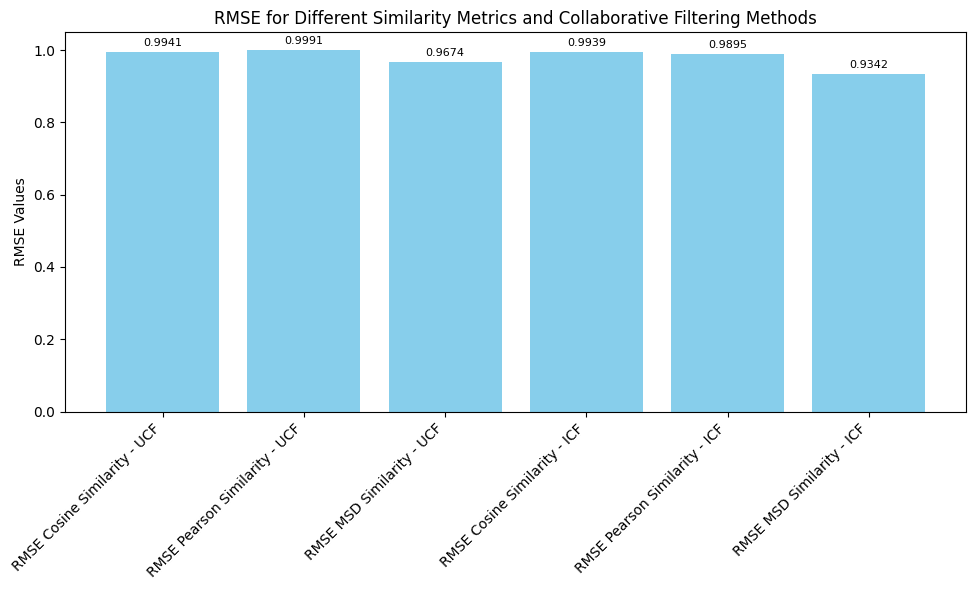

In [21]:
import matplotlib.pyplot as plt

# Data from the original dictionary
final_res = {
    'RMSE Cosine Similarity - UCF': avg_model_ucf_cosine_cv,
    'RMSE Pearson Similarity - UCF': avg_model_ucf_pearson_cv,
    'RMSE MSD Similarity - UCF': avg_model_ucf_msd_cv,
    'RMSE Cosine Similarity - ICF': avg_model_icf_cosine_cv,
    'RMSE Pearson Similarity - ICF': avg_model_icf_pearson_cv,
    'RMSE MSD Similarity - ICF': avg_model_icf_msd_cv
}

# Convert dictionary keys and values into lists
keys = list(final_res.keys())
values = list(final_res.values())

# Creating a vertical bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(keys, values, color='skyblue', label=keys)

# Adding text annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8, color='black')

# Improving the appearance
ax.set_ylabel('RMSE Values')
ax.set_xticklabels(keys, rotation=45, ha="right")
ax.set_title('RMSE for Different Similarity Metrics and Collaborative Filtering Methods')

# Display the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


## 3f. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results. (10 points)

In [22]:
k_values = np.arange(5, 41, 5)
def evaluate_rmse_for_different_k(model: KNNBasic, data: any):
    cv_results = cross_validate(model, data, measures=['RMSE'], cv=5)
    return np.average(cv_results['test_rmse'])    
sim_options_icf = {"name": 'cosine',"user_based": False}
sim_options_ucf = {"name": 'cosine','user_based': True}
results = {}
for k_val in k_values:
    model_icf = KNNBasic(k=k_val, sim_options=sim_options_icf)
    model_ucf = KNNBasic(k=k_val, sim_options=sim_options_ucf)
    
    acc_icf_rmse = evaluate_rmse_for_different_k(model=model_icf, data=ratings)
    acc_ucf_rmse = evaluate_rmse_for_different_k(model=model_ucf, data=ratings)
    results[k_val] = (acc_icf_rmse, acc_ucf_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

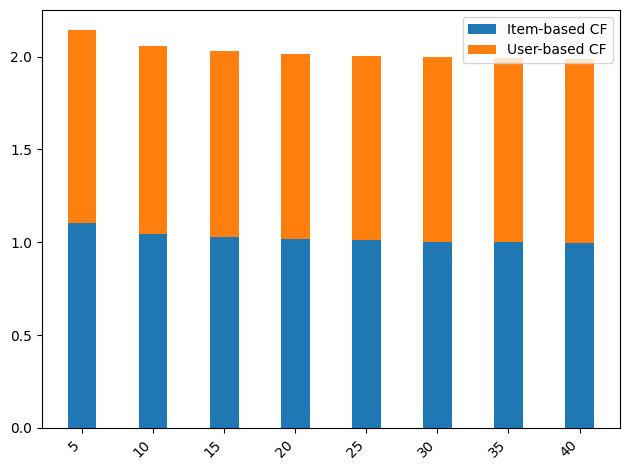

{5: (1.1009992167243827, 1.04255731474766), 10: (1.0463270805280227, 1.0102988797527408), 15: (1.0302582649424448, 0.9999977383074133), 20: (1.0165570996753852, 0.9961838126937655), 25: (1.0095828826436357, 0.9949359596964109), 30: (1.0027759969090737, 0.994998424130776), 35: (0.9992049278738163, 0.9929287219374968), 40: (0.9947654671729917, 0.9938866535297226)}


In [23]:


# Setup for the plot
fig, ax = plt.subplots()
X = list(results.keys())
X_axis = np.arange(len(X))

# Plotting both the item-based and user-based CF results as stacked bars
bar1 = ax.bar(X_axis, [x[0] for x in results.values()], width=0.4, label='Item-based CF')
bar2 = ax.bar(X_axis, [x[1] for x in results.values()], bottom=[x[0] for x in results.values()], width=0.4, label='User-based CF')

# Setting the position of the x ticks
ax.set_xticks(X_axis)
ax.set_xticklabels(X, rotation=45, ha="right")

# Adding legend and making it look good
ax.legend()

# Show the plot
plt.tight_layout()  # This adjusts subplot params so that the subplot(s) fits into the figure area.
plt.show()

# Printing the results for reference
print(results)


## 3g. Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering? (10 points)


In [24]:
minimum_k_ucf_rmse = min(results, key=lambda x : results[x][1])
minimum_k_icf_rmse = min(results, key=lambda x : results[x][0])
print("The best K of User based collaborative filtering based on RMSE:",minimum_k_ucf_rmse )
print("The best K of Item based collaborative filtering based on RMSE",minimum_k_icf_rmse)

The best K of User based collaborative filtering based on RMSE: 35
The best K of Item based collaborative filtering based on RMSE 40
